# Visiopharm data processing

In this notebook, we performed preprocessing of Visiopharm output.

For each run, visiopharm provides a large dataframe including all the samples that have ran. 

The aim of the preprocessing is to obtain for one sample, one dataframe containing necessary informations.

In a second part, we performed kmeans algorithm on the center nuclei coordinates exctracted from the preprocessed dataframes.

# 1. Import packages and data

pip install opencv-python

In [2]:
import cv2
from matplotlib import image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

# for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2. Function definition

In [3]:
def preprocess_visiopharm(path_img, path_csv, name, vertex_x, vertex_y):
    """Preprocessing visiopharm dataframe

    Parameters
    ----------
    path_img : string
        image path
    path_csv : string
        visiopharm output path 
    name : string
        name of the sample
    vertex_x : float
        vertex x in visiopharm
    vertex_y : float
        vertex y in visiopharm
        
    Returns
    -------
    visio_df : pandas dataframe
            Preprocessed dataframe
    """
    img = cv2.imread(path_img)
    visio_csv = pd.read_csv(path_csv, sep='\t')
    visio_csv = visio_csv.drop(columns= ["Study level 1", "Study level 2","Image", "LayerData"])
    visio_df = visio_csv[(visio_csv['Name'] == name)]
    coord = visio_df.drop(columns= ['Name', 'Total Nuclei (#)',
       'Nuclei Area per object', 'Texture inertia', 'Max Intensity',
       'Mean Intensity', 'Min Intensity', 'Modus', 'Texture Anisotropy',
       'Texture Entropy', 'Texture Major Axis', 'Texture Major Direction',
       'Texture Minor Axis'])
    np_coord = coord.to_numpy()
    x,y = zip(*np_coord.tolist())
    x_new = [x * 2 + vertex_x*2 for x in x]
    y_new= [x * -2 + vertex_y*2 for x in y]
    visio_df["new_x"] = x_new
    visio_df["new_y"] = y_new
    
    plt.imshow(img)
    plt.scatter(x_new,y_new, s = 1)
    plt.show()
    
    visio_df.to_csv(f'preprocess_visiopharm/df_{name}.csv')
    
    return(visio_df)

# 3. Perform preprocessing

# 3.1. DLPFC dataset

## 151676

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


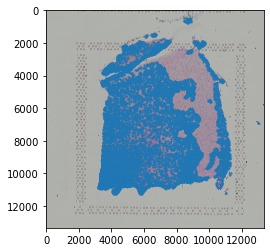

In [12]:
df_151676 = preprocess_visiopharm("visium/151676/spatial/151676.tif", "morphoplogical_features/DPLFC_brain.tsv", "DPLFC_151676_without_background", 3333, 3333)

In [5]:
df_151676

Name  Total Nuclei (#)  \
0      DPLFC_151676_without_background             13404   
1      DPLFC_151676_without_background             13404   
2      DPLFC_151676_without_background             13404   
3      DPLFC_151676_without_background             13404   
4      DPLFC_151676_without_background             13404   
...                                ...               ...   
13399  DPLFC_151676_without_background             13404   
13400  DPLFC_151676_without_background             13404   
13401  DPLFC_151676_without_background             13404   
13402  DPLFC_151676_without_background             13404   
13403  DPLFC_151676_without_background             13404   

       Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                      138.50       478.409601       8.463478        8.463478   
1                       15.50     11542.450202     173.391632       58.333363   
2                       10.50     10414.421568     160.725739       63.310608   
3                       13.50     11517.755505     118.512352       56.744924   
4                       21.50      6711.676488     179.714432       84.848861   
...                       ...              ...            ...             ...   
13399                   10.00      8015.631092     227.865799      111.091171   
13400                   34.50      1517.561706       8.463478        8.463478   
13401                   26.25      1668.667793       8.463478        8.463478   
13402                   37.50      1203.934522       8.463478        8.463478   
13403                   95.00       543.526020       8.463478        8.463478   

       Min Intensity      Modus  Texture Anisotropy  Texture Entropy  \
0           8.463478   8.463478            0.724220         7.593703   
1           5.287324  72.266385            0.523617        10.878269   
2          21.240181  21.240181            0.625472        10.880103   
3          21.115068  21.115068            0.057540        10.699031   
4          33.623196  69.147334            0.357949        10.231761   
...              ...        ...                 ...              ...   
13399      23.015484  23.015484            0.288947        10.999022   
13400       8.463478   8.463478            0.374434         9.057957   
13401       8.463478   8.463478            0.537309         9.102404   
13402       8.463478   8.463478            0.321955         8.836340   
13403       8.463478   8.463478            0.618838         7.930135   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0              374.993693                49.795365          103.415908   
1             7818.062025               173.425880         3724.388177   
2             7576.726581                45.226170         2837.694987   
3             5929.467531               104.818782         5588.287974   
4             4087.373649                70.537003         2624.302839   
...                   ...                      ...                 ...   
13399         4684.618791               136.007348         3331.012301   
13400          933.558958               175.374348          584.002748   
13401         1140.820216               174.063268          527.847576   
13402          717.462388                64.304652          486.472135   
13403          393.528044                 5.656046          149.997977   

          Center X     Center Y         new_x         new_y  
0       903.493682  3088.103791   8472.987365    489.792419  
1       945.750000  3085.306452   8557.500000    495.387097  
2       973.214286  3073.714286   8612.428571    518.571429  
3       993.101852  3066.851852   8652.203704    532.296296  
4       986.709302  3060.639535   8639.418605    544.720930  
...            ...          ...           ...           ...  
13399  -427.325000 -2284.062500   5811.350000  11234.125000  
13400  -420.858696 -2288.594203   5824.282609  11243.188406  
13401  -443.769048 -2293.721

## 151673

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


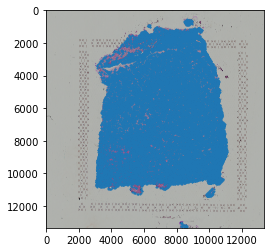

In [13]:
df_151673 = preprocess_visiopharm("visium/151673/spatial/151673.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151673_without_background", 3333, 3333)

## 151607

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


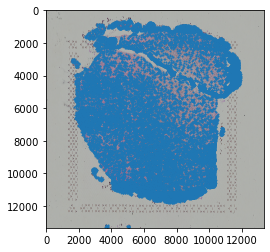

In [16]:
df_151507 = preprocess_visiopharm("visium/151507/spatial/151507.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151507_without_background", 3333, 3333)

## 151508

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


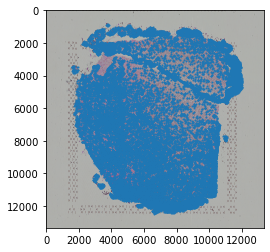

In [17]:
df_151508 = preprocess_visiopharm("visium/151508/spatial/151508.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151508_without_background", 3333, 3333)

## 151509

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


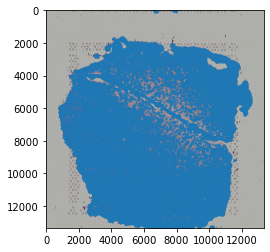

In [18]:
df_151509 = preprocess_visiopharm("visium/151509/spatial/151509.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151509_without_background", 3333, 3333)

## 151510

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


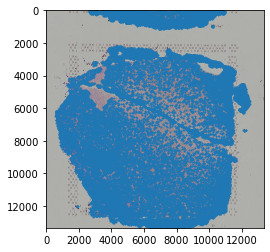

In [ ]:
df_151510 = preprocess_visiopharm("visium/151510/spatial/151510.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151510_without_background", 3333, 3333)

## 151669

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


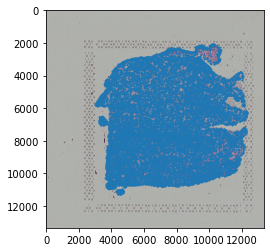

In [20]:
df_151669 = preprocess_visiopharm("visium/151669/spatial/151669.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151669_without_background", 3333, 3333)

## 151670

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


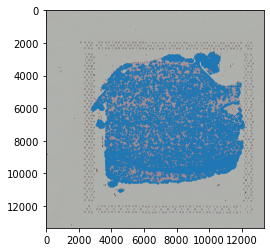

In [21]:
df_151670 = preprocess_visiopharm("visium/151670/spatial/151670.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151670_without_background", 3333, 3333)

## 151671

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


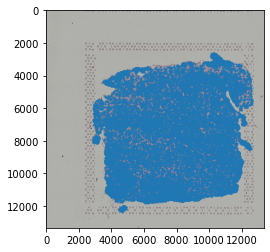

In [29]:
df_151671 = preprocess_visiopharm("visium/151671/spatial/151671.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151671_without_background", 3333, 3333)

## 151672

/tmp/ipykernel_633/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_633/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


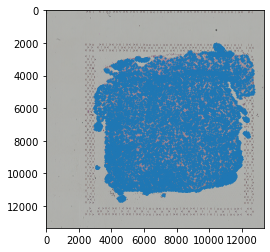

In [4]:
df_151672 = preprocess_visiopharm("visium/151672/spatial/151672.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151672_without_background", 3333, 3333)

## 151674

/tmp/ipykernel_77/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_77/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


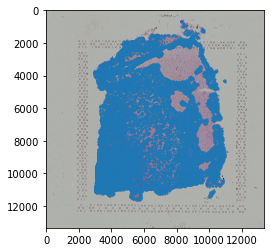

In [23]:
df_151674 = preprocess_visiopharm("visium/151674/spatial/151674.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151674_without_background", 3333, 3333)

## 151675

/tmp/ipykernel_633/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_633/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


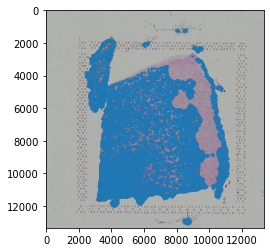

In [7]:
df_151675 = preprocess_visiopharm("visium/151675/spatial/151675.tif", "morphoplogical_features/DFPLCwoBG_Results_20230615.tsv", "DPLFC_151675_without_background", 3333, 3333)

# 3.2. PDAC dataset

## A1

/tmp/ipykernel_143/3074813826.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_143/3074813826.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


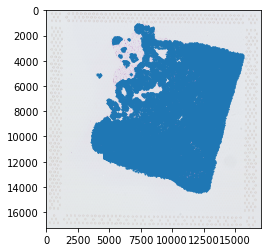

In [4]:
PDAC_A1_df = preprocess_visiopharm("./../input_images/PDAC_12747476B_A1.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "A1_without_background", 4261, 4310)

## B2

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


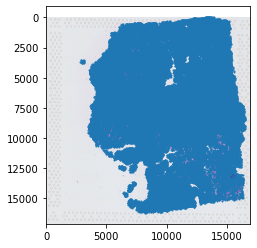

In [21]:
PDAC_B2_df = preprocess_visiopharm("./../input_images/PDAC_ILS50185PT2_B2.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "B2_without_background", 4227, 4227)

## C3

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


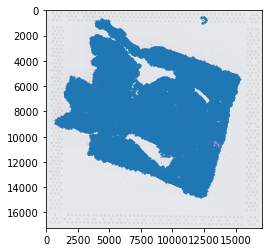

In [23]:
PanCN_C3_df = preprocess_visiopharm("./../input_images/PanCN_AVD_79MZ_0594_C3.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "C3_without_background", 4267, 4304)

## D4

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


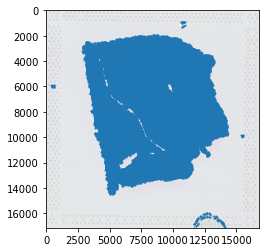

In [24]:
PanCN_D4_df = preprocess_visiopharm("./../input_images/PanCN_AVD_61VQ_0158_D4.jpg", "morphoplogical_features/Images_without_background_Results_20230612.tsv", "D4_without_background", 4192, 4284)

# 3.3. Mouse brain dataset

/tmp/ipykernel_94/571928587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_x"] = x_new
/tmp/ipykernel_94/571928587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visio_df["new_y"] = y_new


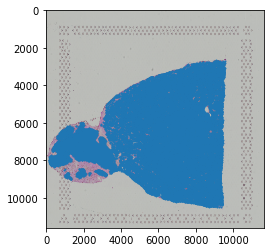

In [27]:
V1_Mouse_Brain_Sagittal_Anterior_df = preprocess_visiopharm("./../input_images/mouse_brain/V1_Mouse_Brain_Sagittal_Anterior_image.tif", "morphoplogical_features/DPLFC_brain.tsv", "V1_Mouse_Brain_Sagittal_Anterior_image_without_background", 2905, 2902)

# 4. Kmeans Clustering

Finally, we performed kmeans clustering on center nuclei coordinates. We ran the algorithm only for testing and visualization. No conclusion/interpretation is drawn from this test.

## A1

### Without coordinates

Begin with df without the x and y coordinates :

In [7]:
A1_df_wo_coords = PDAC_A1_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
A1_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   39.00      1033.801597       8.463478        8.329601   
1                   23.75      1570.536975       8.463478        8.463478   
2                   33.25      4928.409008      22.767019        8.212570   
3                  121.25     10531.297830     161.933609       10.276105   
4                   31.25      1098.962683       8.463478        8.463478   

   Min Intensity     Modus  Texture Anisotropy  Texture Entropy  \
0       1.501885  8.461778            0.248777         8.730647   
1       8.463478  8.463478            0.518083         9.147576   
2       1.501885  8.458740            0.562448         9.523190   
3       8.463478  8.463478            0.667709        10.258084   
4       8.463478  8.463478            0.199575         8.875227   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  
0          590.331150               166.857141          443.470447  
1         1059.800962               161.842605          510.736013  
2         3428.334408                11.852310         1500.074601  
3         7904.653994                 2.087258         2626.643836  
4          610.390810                27.352479          488.571874

In [142]:
A1_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            68182.000000     6.818200e+04   68182.000000    68182.000000   
mean                27.431723     3.267587e+04     212.066145      151.974144   
std                 15.035154     9.156860e-09      29.637680       42.915659   
min                 10.000000     3.267587e+04      91.276756       33.192097   
25%                 17.250000     3.267587e+04     191.669586      118.757015   
50%                 23.250000     3.267587e+04     215.546661      146.378921   
75%                 33.250000     3.267587e+04     234.646252      180.235472   
max                227.250000     3.267587e+04     255.000000      254.691299   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   68182.000000  68182.000000        68182.000000     68182.000000   
mean       97.481690    127.527932            0.342633         9.234402   
std        55.911788     63.046698            0.166032         1.480488   
min         0.013496      0.250160            0.000000         2.201910   
25%        55.993351     76.783691            0.219707         9.094605   
50%        83.338570    117.896809            0.338702         9.534198   
75%       125.606115    171.761044            0.462058         9.894587   
max       254.691299    255.000000            0.876285        11.468803   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count        68182.000000             68182.000000        68182.000000  
mean          2093.294367                85.581673         1329.504993  
std           1343.631490                58.769841          857.386913  
min              0.847026                 0.000000            0.847026  
25%           1191.395463                30.530560          722.520636  
50%           1839.712333                82.905361         1157.502885  
75%           2695.297950               141.531195         1757.728998  
max          17674.775230               179.998961         9136.641144

To give equal importance to all features, scale the features :

In [143]:
mms = StandardScaler()
mms.fit(A1_df_wo_coords)
A1_df_wo_coords_transformed = mms.transform(A1_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [144]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(A1_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

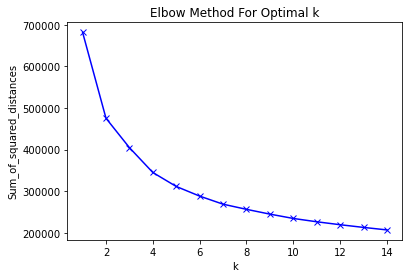

In [145]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [169]:
kmeans_A1_wo_coords = KMeans(n_clusters=4).fit(A1_df_wo_coords_transformed)
centroids = kmeans_A1_wo_coords.cluster_centers_
print(centroids)

[[ 3.71292000e-01  1.00000000e+00  1.37210099e-01 -5.83873950e-02
  -1.98820057e-01 -6.92590000e-02  4.08511410e-02  3.12038423e-02
  -3.22818629e-01 -5.31560547e-03 -3.40317255e-01]
 [ 5.87253377e-02  1.00000000e+00  9.56651439e-01  1.43285822e+00
   1.46584635e+00  1.38141014e+00  4.04605901e-01 -1.53182670e-03
  -5.41983789e-01  5.77545267e-02 -6.47321834e-01]
 [-5.31983133e-01  1.00000000e+00 -8.66975548e-01 -9.57394605e-01
  -7.99018014e-01 -9.06191945e-01 -1.87711691e-01  5.15631575e-01
   9.91617941e-01  6.59600491e-02  1.08915547e+00]
 [ 6.43345910e-02  1.00000000e+00 -1.55097286e-02 -1.28981799e-02
  -1.28054533e-02 -1.24401324e-02 -1.29419177e+00 -4.56135406e+00
  -1.49064569e+00 -8.28174644e-01 -1.48049324e+00]]


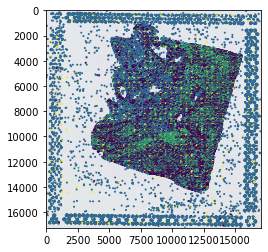

In [170]:
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [148]:
A1_df_with_coords = PDAC_A1_df.drop(columns = ["Name", "Total Nuclei (#)"])

In [151]:
A1_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            68182.000000     6.818200e+04   68182.000000    68182.000000   
mean                27.431723     3.267587e+04     212.066145      151.974144   
std                 15.035154     9.156860e-09      29.637680       42.915659   
min                 10.000000     3.267587e+04      91.276756       33.192097   
25%                 17.250000     3.267587e+04     191.669586      118.757015   
50%                 23.250000     3.267587e+04     215.546661      146.378921   
75%                 33.250000     3.267587e+04     234.646252      180.235472   
max                227.250000     3.267587e+04     255.000000      254.691299   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   68182.000000  68182.000000        68182.000000     68182.000000   
mean       97.481690    127.527932            0.342633         9.234402   
std        55.911788     63.046698            0.166032         1.480488   
min         0.013496      0.250160            0.000000         2.201910   
25%        55.993351     76.783691            0.219707         9.094605   
50%        83.338570    117.896809            0.338702         9.534198   
75%       125.606115    171.761044            0.462058         9.894587   
max       254.691299    255.000000            0.876285        11.468803   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count        68182.000000             68182.000000        68182.000000   
mean          2093.294367                85.581673         1329.504993   
std           1343.631490                58.769841          857.386913   
min              0.847026                 0.000000            0.847026   
25%           1191.395463                30.530560          722.520636   
50%           1839.712333                82.905361         1157.502885   
75%           2695.297950               141.531195         1757.728998   
max          17674.775230               179.998961         9136.641144   

           Center X      Center Y  
count  68182.000000  68182.000000  
mean     778.123637      5.081502  
std     1657.038284   1766.219321  
min    -4244.929752  -4302.895833  
25%     -423.401122  -1161.723059  
50%      866.600891   -315.317389  
75%     2113.970937   1387.275584  
max     4249.293839   4281.609259

To give equal importance to all features, scale the features :

In [150]:
mms = StandardScaler()
mms.fit(A1_df_with_coords)
A1_df_with_coords_transformed = mms.transform(A1_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [152]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(A1_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

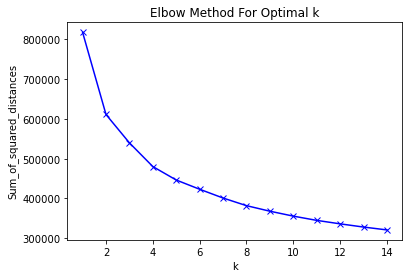

In [153]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
kmeans_A1_with_coords = KMeans(n_clusters=4).fit(A1_df_with_coords_transformed)
centroids = kmeans_A1_with_coords.cluster_centers_
print(centroids)

[[ 3.64853663e-01  1.00000000e+00  1.34655928e-01 -5.92974666e-02
  -1.98768626e-01 -7.05435069e-02  3.82056965e-02  3.34864916e-02
  -3.20248450e-01 -7.88669584e-03 -3.36572587e-01  5.94985082e-02
  -4.07244357e-02]
 [ 6.17937845e-02  1.00000000e+00  9.56561856e-01  1.43212361e+00
   1.46525656e+00  1.38125580e+00  4.06961895e-01 -2.79820565e-03
  -5.42063299e-01  6.09713208e-02 -6.48420281e-01 -2.44715788e-01
   8.90655322e-02]
 [-5.31961486e-01  1.00000000e+00 -8.69932773e-01 -9.60965375e-01
  -8.01834737e-01 -9.09283209e-01 -1.87403512e-01  5.16752977e-01
   9.97056692e-01  6.76319720e-02  1.09453803e+00  1.01556406e-01
  -1.00366793e-02]
 [ 6.38749807e-02  1.00000000e+00 -1.58617320e-02 -1.36865103e-02
  -1.37424144e-02 -1.32915987e-02 -1.29357354e+00 -4.56081666e+00
  -1.49029538e+00 -8.29154487e-01 -1.48020732e+00 -1.55642604e-02
  -9.65814326e-03]]


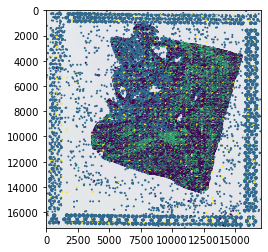

In [176]:
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_with_coords.labels_.astype(float))
plt.show()

## B2

### Without coordinates

Begin with df without the x and y coordinates :

In [94]:
B2_df_wo_coords = PDAC_B2_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
B2_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   22.50     13221.945991     148.265762      123.238940   
1                   56.25     13221.945991     229.297897      180.612488   
2                   18.50     13221.945991     219.379120      164.964777   
3                   13.25     13221.945991     209.646164      152.203821   
4                   18.50     13221.945991     246.869537      169.691705   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      97.844582  111.745285        1.554312e-15         2.201911   
1     138.413345  158.885101        1.733108e-01         2.203774   
2      98.549644  117.509422        1.757970e-01         9.646840   
3     107.101357  145.107941        7.963259e-01        10.012107   
4      99.229431  134.526611        2.588855e-01         9.693675   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  
0            0.847026                 0.000000            0.847026  
1            1.682064                29.911218            1.390544  
2         1512.508475               110.905018         1246.614048  
3         5461.165999                 1.543453         1112.298000  
4         1467.966275               152.599960         1087.931141

In [74]:
B2_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            90953.000000     9.095300e+04   90953.000000    90953.000000   
mean                31.163884     1.322195e+04     204.017360      139.987534   
std                 18.857990     5.102293e-09      33.183889       38.100735   
min                  7.000000     1.322195e+04      44.850224       38.620830   
25%                 17.500000     1.322195e+04     180.422241      113.230889   
50%                 26.000000     1.322195e+04     204.370468      136.099588   
75%                 39.250000     1.322195e+04     230.826965      162.532606   
max                301.000000     1.322195e+04     255.000000      255.000000   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   90953.000000  90953.000000        90953.000000     90953.000000   
mean       81.182518    114.604239            0.338959         9.203006   
std        45.290133     56.881728            0.161323         1.473738   
min         0.015277      0.954327            0.000000         2.201910   
25%        49.138981     72.354988            0.221601         9.005652   
50%        73.296837    107.286453            0.337037         9.445340   
75%       103.983727    146.927094            0.453982         9.870932   
max       255.000000    255.000000            0.907566        11.782099   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count        90953.000000             90953.000000        90953.000000  
mean          2063.376395                85.183683         1300.051338  
std           1549.835808                54.909683          965.242272  
min              0.847026                 0.000000            0.847026  
25%           1082.980442                37.563174          688.137752  
50%           1673.730185                83.045889         1056.119310  
75%           2573.042965               133.175604         1613.221189  
max          20478.707443               179.998103        11408.786853

To give equal importance to all features, scale the features :

In [81]:
mms = StandardScaler()
mms.fit(B2_df_wo_coords)
B2_df_wo_coords_transformed = mms.transform(B2_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [85]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(B2_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

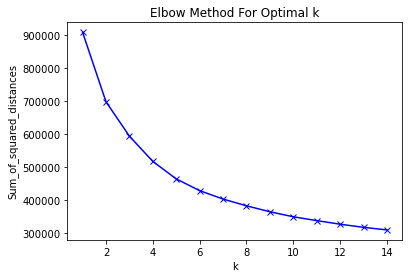

In [86]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [156]:
kmeans_B2_wo_coords = KMeans(n_clusters=4).fit(B2_df_wo_coords_transformed)
centroids = kmeans_B2_wo_coords.cluster_centers_
print(centroids)

[[-0.68049857 -1.         -0.6517785  -0.95407707 -0.79006966 -0.93378581
   0.03230843  0.68184046  1.44946562  0.05275167  1.47826962]
 [-0.1654582  -1.          0.9095865   1.27358545  1.17168575  1.19936565
   0.06507013  0.08330041 -0.38811528  0.0336754  -0.3985937 ]
 [ 0.35384996 -1.         -0.18928688 -0.24856535 -0.2627744  -0.21831665
   0.05098694  0.02395181 -0.29458952  0.02454506 -0.30019078]
 [ 0.02689667 -1.         -0.01471645 -0.01792173 -0.03185484 -0.03788463
  -1.28995522 -4.54563117 -1.27289602 -0.83686755 -1.28315804]]


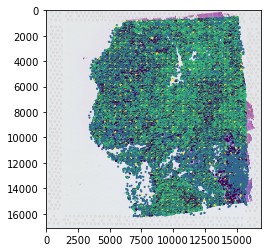

In [157]:
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [72]:
B2_df_with_coords = PDAC_B2_df.drop(columns = ["Name", "Total Nuclei (#)"])

In [75]:
B2_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count            90953.000000     9.095300e+04   90953.000000    90953.000000   
mean                31.163884     1.322195e+04     204.017360      139.987534   
std                 18.857990     5.102293e-09      33.183889       38.100735   
min                  7.000000     1.322195e+04      44.850224       38.620830   
25%                 17.500000     1.322195e+04     180.422241      113.230889   
50%                 26.000000     1.322195e+04     204.370468      136.099588   
75%                 39.250000     1.322195e+04     230.826965      162.532606   
max                301.000000     1.322195e+04     255.000000      255.000000   

       Min Intensity         Modus  Texture Anisotropy  Texture Entropy  \
count   90953.000000  90953.000000        90953.000000     90953.000000   
mean       81.182518    114.604239            0.338959         9.203006   
std        45.290133     56.881728            0.161323         1.473738   
min         0.015277      0.954327            0.000000         2.201910   
25%        49.138981     72.354988            0.221601         9.005652   
50%        73.296837    107.286453            0.337037         9.445340   
75%       103.983727    146.927094            0.453982         9.870932   
max       255.000000    255.000000            0.907566        11.782099   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count        90953.000000             90953.000000        90953.000000   
mean          2063.376395                85.183683         1300.051338   
std           1549.835808                54.909683          965.242272   
min              0.847026                 0.000000            0.847026   
25%           1082.980442                37.563174          688.137752   
50%           1673.730185                83.045889         1056.119310   
75%           2573.042965               133.175604         1613.221189   
max          20478.707443               179.998103        11408.786853   

           Center X      Center Y  
count  90953.000000  90953.000000  
mean     890.666957    390.933069  
std     1559.243654   2112.007354  
min    -2533.949153  -3829.585938  
25%     -286.762712  -1029.713018  
50%      966.421569    509.482143  
75%     2188.392308   2153.859848  
max     3715.922414   4006.703883

To give equal importance to all features, scale the features :

In [100]:
mms = StandardScaler()
mms.fit(B2_df_with_coords)
B2_df_with_coords_transformed = mms.transform(B2_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [101]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(B2_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

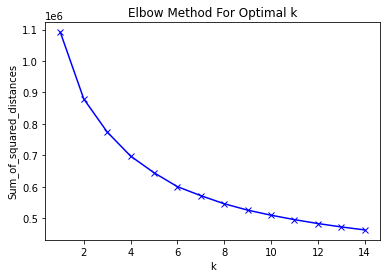

In [102]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [158]:
kmeans_B2_with_coords = KMeans(n_clusters=4).fit(B2_df_with_coords_transformed)
centroids = kmeans_B2_with_coords.cluster_centers_
print(centroids)

[[ 0.36261974 -1.         -0.20172507 -0.25676553 -0.26499574 -0.219994
   0.0586901   0.02026179 -0.29751181  0.02901495 -0.30579607  0.12368768
   0.07212713]
 [-0.67898348 -1.         -0.64610313 -0.9488763  -0.78731631 -0.93146733
   0.02529647  0.67991624  1.43829124  0.04906885  1.47041539 -0.01882759
  -0.11098961]
 [ 0.0255816  -1.         -0.01403499 -0.01536834 -0.0283024  -0.03476249
  -1.28883806 -4.54452922 -1.27260929 -0.83589926 -1.28283492 -0.0686915
   0.05441291]
 [-0.16490781 -1.          0.90798724  1.25620798  1.1452442   1.1739432
   0.05561967  0.08680199 -0.38326933  0.02756334 -0.39132926 -0.21450578
  -0.05923881]]


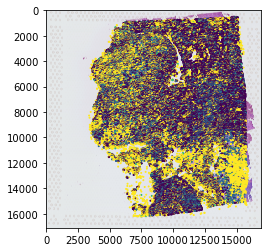

In [159]:
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_with_coords.labels_.astype(float))
plt.show()

## C3

### Without coordinates

Begin with df without the x and y coordinates :

In [107]:
C3_df_wo_coords = PanCN_C3_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
C3_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   37.00      4624.952512     104.315163       70.199417   
1                   52.50      4624.952512     105.821548       60.258968   
2                   33.50      4624.952512     132.559052      104.915861   
3                   34.75      4624.952512     114.042694       65.169379   
4                   50.00      4624.952512     111.790764       80.436637   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      49.392860   60.350582            0.261332         8.969983   
1      33.355782   41.344807            0.394836         8.944638   
2      64.481720  132.559052            0.075851         9.050427   
3      41.246712   74.150513            0.508010         9.324317   
4      46.212833   59.376213            0.281402         8.800007   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  
0         1097.227225                32.302473          810.486585  
1         1774.762880                75.181738         1074.023232  
2          824.995626                30.106611          762.419292  
3         1972.432776               169.161279          970.418105  
4          700.064283               128.933254          503.064811

In [108]:
C3_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           148873.000000     1.488730e+05  148873.000000   148873.000000   
mean                37.984287     4.624953e+03     144.788495       90.269838   
std                 19.190290     6.958567e-09      39.533366       33.036133   
min                  9.000000     4.624953e+03      25.470585       18.158883   
25%                 25.500000     4.624953e+03     117.159142       69.719185   
50%                 34.500000     4.624953e+03     138.569305       82.726312   
75%                 46.000000     4.624953e+03     164.517227       99.978879   
max                289.000000     4.624953e+03     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  148873.000000  148873.000000       148873.000000    148873.000000   
mean       50.932854      75.731491            0.284397         8.953296   
std        29.886122      39.034225            0.142446         1.427927   
min         0.014425       0.024344            0.000000         2.201910   
25%        33.520626      52.611786            0.180197         8.874935   
50%        44.204834      67.219177            0.276941         9.195923   
75%        59.383366      86.220314            0.381013         9.514047   
max       255.000000     255.000000            0.880416        12.317686   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count       148873.000000            148873.000000       148873.000000  
mean          1577.088688                87.346434         1079.828389  
std           1007.611266                55.866830          613.644446  
min              0.847026                 0.000000            0.847026  
25%           1029.843361                37.082894          725.300038  
50%           1387.266242                87.119730          982.608919  
75%           1877.489854               136.721037         1308.980110  
max          22669.608112               179.999346        18513.336566

To give equal importance to all features, scale the features :

In [109]:
mms = StandardScaler()
mms.fit(C3_df_wo_coords)
C3_df_wo_coords_transformed = mms.transform(C3_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [110]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(C3_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

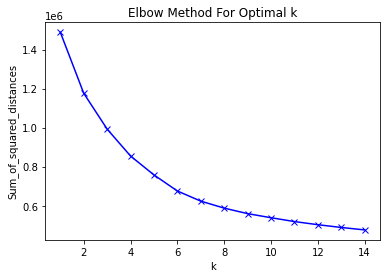

In [111]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [160]:
kmeans_C3_wo_coords = KMeans(n_clusters=4).fit(C3_df_wo_coords_transformed)
centroids = kmeans_C3_wo_coords.cluster_centers_
print(centroids)

[[-4.90204801e-01  1.00000000e+00  2.20433488e+00  2.93411575e+00
   2.75928317e+00  2.82302414e+00  4.99683200e-01  1.56277439e-01
  -1.32654897e-01  6.03759896e-02 -3.03554751e-01  1.73184875e-01
   3.23528814e-01]
 [-7.81153123e-01  1.00000000e+00  1.19966815e-01 -1.56693254e-01
  -3.08542786e-01 -3.49718161e-01  3.53520542e-01  6.43321901e-01
   1.45485053e+00  2.13103812e-02  1.42418940e+00  8.39297021e-02
  -4.42035577e-02]
 [ 2.38095999e-01  1.00000000e+00 -2.26869652e-01 -2.21586600e-01
  -1.67324948e-01 -1.62539683e-01 -7.88426923e-02  7.07306288e-02
  -2.74177170e-01  3.43610224e-02 -2.40644618e-01 -3.72671587e-02
  -1.79579720e-02]
 [ 7.84553972e-02  1.00000000e+00 -9.56700155e-02 -1.34284003e-01
  -1.31639124e-01 -1.35407894e-01 -1.02028658e+00 -4.48890623e+00
  -1.47855232e+00 -8.20445288e-01 -1.66215486e+00  3.38317508e-03
  -8.75203474e-03]]


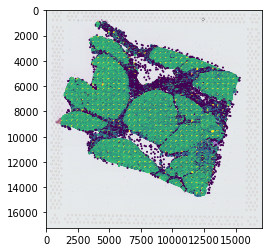

In [161]:
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [127]:
C3_df_with_coords = PanCN_C3_df.drop(columns = ["Name", "Total Nuclei (#)"])
C3_df_with_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
0                   37.00      4624.952512     104.315163       70.199417   
1                   52.50      4624.952512     105.821548       60.258968   
2                   33.50      4624.952512     132.559052      104.915861   
3                   34.75      4624.952512     114.042694       65.169379   
4                   50.00      4624.952512     111.790764       80.436637   

   Min Intensity       Modus  Texture Anisotropy  Texture Entropy  \
0      49.392860   60.350582            0.261332         8.969983   
1      33.355782   41.344807            0.394836         8.944638   
2      64.481720  132.559052            0.075851         9.050427   
3      41.246712   74.150513            0.508010         9.324317   
4      46.212833   59.376213            0.281402         8.800007   

   Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
0         1097.227225                32.302473          810.486585   
1         1774.762880                75.181738         1074.023232   
2          824.995626                30.106611          762.419292   
3         1972.432776               169.161279          970.418105   
4          700.064283               128.933254          503.064811   

      Center X     Center Y  
0 -2236.405405  3823.064189  
1 -2229.757143  3820.059524  
2 -2227.414179  3812.813433  
3 -2231.764388  3805.392086  
4 -2247.412500  3804.812500

In [128]:
C3_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           148873.000000     1.488730e+05  148873.000000   148873.000000   
mean                37.984287     4.624953e+03     144.788495       90.269838   
std                 19.190290     6.958567e-09      39.533366       33.036133   
min                  9.000000     4.624953e+03      25.470585       18.158883   
25%                 25.500000     4.624953e+03     117.159142       69.719185   
50%                 34.500000     4.624953e+03     138.569305       82.726312   
75%                 46.000000     4.624953e+03     164.517227       99.978879   
max                289.000000     4.624953e+03     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  148873.000000  148873.000000       148873.000000    148873.000000   
mean       50.932854      75.731491            0.284397         8.953296   
std        29.886122      39.034225            0.142446         1.427927   
min         0.014425       0.024344            0.000000         2.201910   
25%        33.520626      52.611786            0.180197         8.874935   
50%        44.204834      67.219177            0.276941         9.195923   
75%        59.383366      86.220314            0.381013         9.514047   
max       255.000000     255.000000            0.880416        12.317686   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count       148873.000000            148873.000000       148873.000000   
mean          1577.088688                87.346434         1079.828389   
std           1007.611266                55.866830          613.644446   
min              0.847026                 0.000000            0.847026   
25%           1029.843361                37.082894          725.300038   
50%           1387.266242                87.119730          982.608919   
75%           1877.489854               136.721037         1308.980110   
max          22669.608112               179.999346        18513.336566   

            Center X       Center Y  
count  148873.000000  148873.000000  
mean     -113.085518     214.402702  
std      1699.865676    1414.581046  
min     -3644.908537   -3045.835616  
25%     -1571.316667    -861.970588  
50%       -13.034483     225.486486  
75%      1337.761194    1222.879433  
max      3402.091304    3838.837838

To give equal importance to all features, scale the features :

In [129]:
mms = StandardScaler()
mms.fit(C3_df_with_coords)
C3_df_with_coords_transformed = mms.transform(C3_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [130]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(C3_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

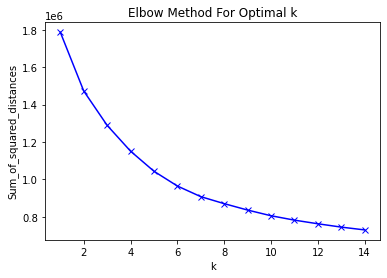

In [131]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
kmeans_C3_with_coords = KMeans(n_clusters=4).fit(C3_df_with_coords_transformed)
centroids = kmeans_C3_with_coords.cluster_centers_
print(centroids)

[[-8.30008454e-01  1.00000000e+00  3.51362018e-01 -1.65601424e-01
  -4.64471651e-01 -4.89134888e-01  4.98253772e-01  7.66555860e-01
   2.21815325e+00  1.22234053e-02  2.09874579e+00  1.03593147e-01
  -3.80415645e-02]
 [-2.07705864e-01  1.00000000e+00 -2.89906783e-01 -2.39425975e-01
  -1.61684076e-01 -1.87862835e-01 -3.87828974e-02  2.12472533e-01
  -5.39386523e-02  7.12626490e-02 -1.18420346e-03 -2.21254378e-02
   1.69249228e-03]
 [ 1.33116096e+00  1.00000000e+00  7.71832386e-02 -1.09516543e-01
  -1.77835924e-01 -9.30182460e-02 -2.79603241e-01 -1.17680104e+00
  -8.47548499e-01 -2.79242120e-01 -9.16230285e-01 -3.42192655e-02
  -1.02220540e-01]
 [-5.09242339e-01  1.00000000e+00  2.20639493e+00  2.93630245e+00
   2.76019930e+00  2.81867064e+00  4.87093346e-01  1.15699326e-01
  -1.36589647e-01  5.21765912e-02 -3.08350295e-01  1.75173173e-01
   3.22284645e-01]]


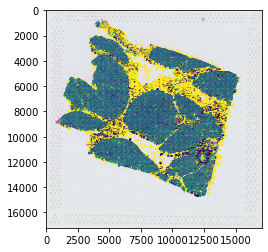

In [163]:
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_with_coords.labels_.astype(float))
plt.show()

## D4

### Without coordinates

Begin with df without the x and y coordinates :

In [115]:
D4_df_wo_coords = PanCN_D4_df.drop(columns = ["Name", "Total Nuclei (#)", "Center X", "Center Y", "new_x", "new_y"])
D4_df_wo_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  \
148873                   67.25     16869.514073     207.866180   
148874                   15.50     16869.514073     225.621124   
148875                   53.50     16869.514073     214.179367   
148876                   72.00     16869.514073     103.540054   
148877                  108.75     16869.514073     178.337784   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
148873       76.370522      20.588024   53.203392            0.471223   
148874      116.456644      40.488068   49.444714            0.531944   
148875       85.728792      21.559574   65.804230            0.168971   
148876       44.120308      13.217054   26.305471            0.111171   
148877      104.297971      36.331284  110.689919            0.489828   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
148873         8.992499         1619.012666                11.602354   
148874        10.161641         3495.264459               179.671109   
148875         9.133137         1763.510254                 6.999199   
148876         8.370774         1543.516585                77.947098   
148877         8.255667          750.763866                31.119760   

        Texture Minor Axis  
148873          856.096916  
148874         1635.978268  
148875         1465.527808  
148876         1371.922466  
148877          383.018743

In [116]:
D4_df_wo_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           159747.000000     1.597470e+05  159747.000000   159747.000000   
mean                43.310485     1.686951e+04     132.028745       70.936272   
std                 24.135765     6.805952e-08      39.711392       28.702797   
min                  8.000000     1.686951e+04      18.200392        8.171179   
25%                 27.000000     1.686951e+04     103.010284       52.457065   
50%                 38.000000     1.686951e+04     126.895981       64.034750   
75%                 53.500000     1.686951e+04     154.849686       81.529248   
max                309.750000     1.686951e+04     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  159747.000000  159747.000000       159747.000000    159747.000000   
mean       33.676302      55.116022            0.282851         9.018716   
std        24.770797      33.260107            0.141798         1.445190   
min         0.007366       0.011769            0.000000         2.201910   
25%        19.701595      35.252743            0.179601         8.904434   
50%        27.803898      46.909931            0.275623         9.246738   
75%        40.452637      65.330410            0.378418         9.604094   
max       255.000000     255.000000            0.863304        11.941506   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  
count       159747.000000            159747.000000       159747.000000  
mean          1904.220659                94.120848         1303.749938  
std           1242.026750                58.272379          768.782900  
min              0.847026                 0.000000            0.847026  
25%           1182.185673                40.203487          845.426196  
50%           1638.289787                97.566846         1158.808404  
75%           2300.339132               148.738344         1590.438772  
max          22483.500143               179.999667        12651.292450

To give equal importance to all features, scale the features :

In [117]:
mms = StandardScaler()
mms.fit(D4_df_wo_coords)
D4_df_wo_coords_transformed = mms.transform(D4_df_wo_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [118]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(D4_df_wo_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

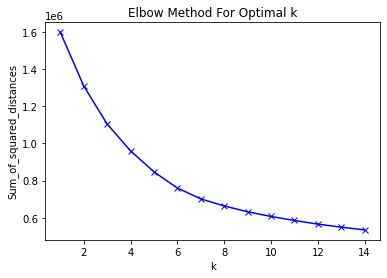

In [119]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [164]:
kmeans_D4_wo_coords = KMeans(n_clusters=4).fit(D4_df_wo_coords_transformed)
centroids = kmeans_D4_wo_coords.cluster_centers_
print(centroids)

[[-6.67779765e-01 -1.00000000e+00 -1.61178805e-03 -3.15591608e-01
  -4.26442465e-01 -4.40761849e-01  3.90970187e-01  6.63302009e-01
   1.48374550e+00  3.86886347e-02  1.43353027e+00]
 [ 2.55096846e-01 -1.00000000e+00 -2.15054492e-01 -2.23356697e-01
  -1.69542859e-01 -1.69353842e-01 -1.14513715e-01  5.27617294e-02
  -2.99202949e-01  3.98071062e-02 -2.56606478e-01]
 [ 5.50751070e-02 -1.00000000e+00 -3.52636610e-02 -6.30343719e-02
  -7.27177680e-02 -6.11737502e-02 -9.66041131e-01 -4.46771574e+00
  -1.44925935e+00 -8.73344527e-01 -1.60453038e+00]
 [-4.74966665e-01 -1.00000000e+00  1.51475230e+00  2.20624562e+00
   2.05530941e+00  2.07762726e+00  4.19468627e-01  1.54937676e-01
  -2.61974103e-01  5.27602785e-03 -3.95141290e-01]]


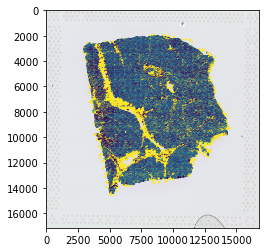

In [165]:
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_wo_coords.labels_.astype(float))
plt.show()

### With coordinates 

In [134]:
D4_df_with_coords = PanCN_D4_df.drop(columns = ["Name", "Total Nuclei (#)"])
D4_df_with_coords.head()

Nuclei Area per object  Texture inertia  Max Intensity  \
148873                   67.25     16869.514073     207.866180   
148874                   15.50     16869.514073     225.621124   
148875                   53.50     16869.514073     214.179367   
148876                   72.00     16869.514073     103.540054   
148877                  108.75     16869.514073     178.337784   

        Mean Intensity  Min Intensity       Modus  Texture Anisotropy  \
148873       76.370522      20.588024   53.203392            0.471223   
148874      116.456644      40.488068   49.444714            0.531944   
148875       85.728792      21.559574   65.804230            0.168971   
148876       44.120308      13.217054   26.305471            0.111171   
148877      104.297971      36.331284  110.689919            0.489828   

        Texture Entropy  Texture Major Axis  Texture Major Direction  \
148873         8.992499         1619.012666                11.602354   
148874        10.161641         3495.264459               179.671109   
148875         9.133137         1763.510254                 6.999199   
148876         8.370774         1543.516585                77.947098   
148877         8.255667          750.763866                31.119760   

        Texture Minor Axis    Center X     Center Y  
148873          856.096916 -957.519517  3157.102230  
148874         1635.978268 -972.733871  3155.427419  
148875         1465.527808 -966.883178  3152.855140  
148876         1371.922466 -688.531250  3201.194444  
148877          383.018743 -738.820115  3189.266667

In [135]:
D4_df_with_coords.describe()

Nuclei Area per object  Texture inertia  Max Intensity  Mean Intensity  \
count           159747.000000     1.597470e+05  159747.000000   159747.000000   
mean                43.310485     1.686951e+04     132.028745       70.936272   
std                 24.135765     6.805952e-08      39.711392       28.702797   
min                  8.000000     1.686951e+04      18.200392        8.171179   
25%                 27.000000     1.686951e+04     103.010284       52.457065   
50%                 38.000000     1.686951e+04     126.895981       64.034750   
75%                 53.500000     1.686951e+04     154.849686       81.529248   
max                309.750000     1.686951e+04     255.000000      255.000000   

       Min Intensity          Modus  Texture Anisotropy  Texture Entropy  \
count  159747.000000  159747.000000       159747.000000    159747.000000   
mean       33.676302      55.116022            0.282851         9.018716   
std        24.770797      33.260107            0.141798         1.445190   
min         0.007366       0.011769            0.000000         2.201910   
25%        19.701595      35.252743            0.179601         8.904434   
50%        27.803898      46.909931            0.275623         9.246738   
75%        40.452637      65.330410            0.378418         9.604094   
max       255.000000     255.000000            0.863304        11.941506   

       Texture Major Axis  Texture Major Direction  Texture Minor Axis  \
count       159747.000000            159747.000000       159747.000000   
mean          1904.220659                94.120848         1303.749938   
std           1242.026750                58.272379          768.782900   
min              0.847026                 0.000000            0.847026   
25%           1182.185673                40.203487          845.426196   
50%           1638.289787                97.566846         1158.808404   
75%           2300.339132               148.738344         1590.438772   
max          22483.500143               179.999667        12651.292450   

            Center X       Center Y  
count  159747.000000  159747.000000  
mean      -19.405643     527.971047  
std      1328.007793    1515.311001  
min     -2742.760989   -2999.771186  
25%     -1127.135266    -639.166026  
50%       -42.574324     550.804511  
75%      1075.901006    1835.839262  
max      3002.791379    3307.496094

To give equal importance to all features, scale the features :

In [136]:
mms = StandardScaler()
mms.fit(D4_df_with_coords)
D4_df_with_coords_transformed = mms.transform(D4_df_with_coords)

Use the inertia attribute to identify of the sum of squared distances of samples to the nearest cluster center :

In [137]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(D4_df_with_coords_transformed)
    Sum_of_squared_distances.append(km.inertia_)

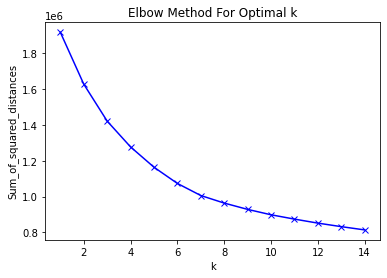

In [138]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [166]:
kmeans_D4_with_coords = KMeans(n_clusters=4).fit(D4_df_with_coords_transformed)
centroids = kmeans_D4_with_coords.cluster_centers_
print(centroids)

[[-0.66556314 -1.         -0.02509585 -0.32484755 -0.42762774 -0.4423213
   0.37618309  0.65663031  1.45383163  0.04030939  1.40998262 -0.22225254
   0.13896655]
 [-0.47266587 -1.          1.48135645  2.15408416  2.00522658  2.02343247
   0.41371637  0.15753694 -0.25881554  0.00885198 -0.38972276 -0.0642479
  -0.18725013]
 [ 0.26500205 -1.         -0.21565692 -0.22781835 -0.17425265 -0.17338223
  -0.11601603  0.04974521 -0.30295118  0.0390624  -0.26082122  0.07457214
  -0.01168276]
 [ 0.05406604 -1.         -0.03412101 -0.06096386 -0.07122777 -0.05954565
  -0.96679683 -4.46859345 -1.44946524 -0.87385372 -1.60479997  0.01301822
  -0.0145847 ]]


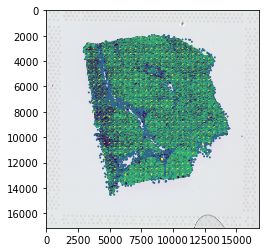

In [167]:
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_with_coords.labels_.astype(float))
plt.show()

## Plot results

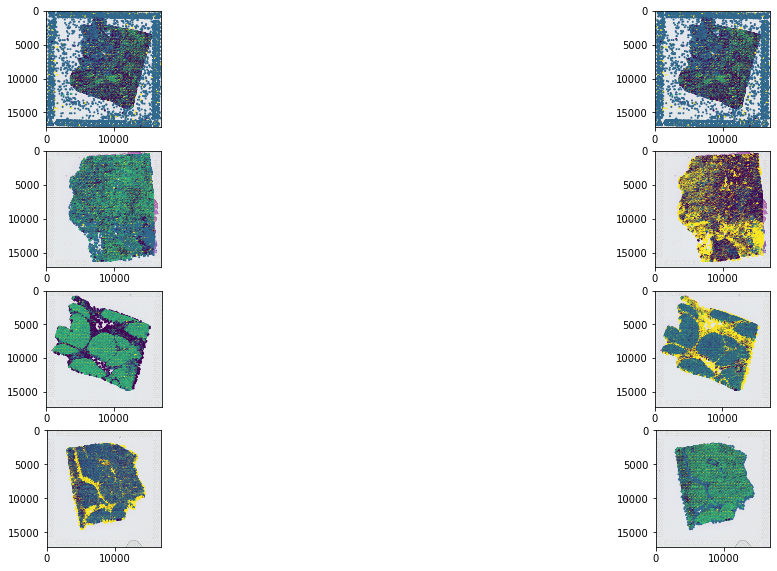

In [178]:
# create figure
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 6
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 2)
plt.imshow(img_A1)
plt.scatter(x_A1_new,y_A1_new, s = 1, c=kmeans_A1_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 3)
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 4)
plt.imshow(img_B2)
plt.scatter(x_B2_new,y_B2_new, s = 1, c=kmeans_B2_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 5)
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 6)
plt.imshow(img_C3)
plt.scatter(x_C3_new,y_C3_new, s = 1, c=kmeans_C3_with_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 7)
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_wo_coords.labels_.astype(float))

fig.add_subplot(rows, columns, 8)
plt.imshow(img_D4)
plt.scatter(x_D4_new,y_D4_new, s = 1, c=kmeans_D4_with_coords.labels_.astype(float))

# 5. Image quality of the three datasets

Text(0.5, 1.0, 'PDAC B2')

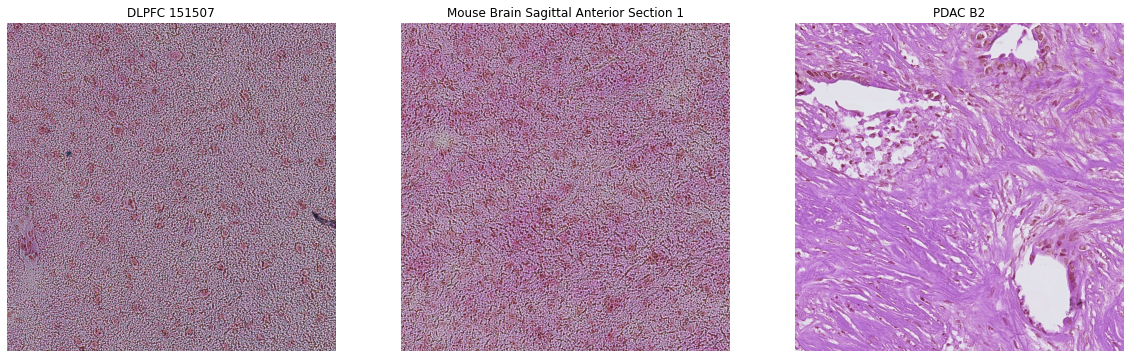

In [44]:
# create figure
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 3
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(img_151507)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('DLPFC 151507')

fig.add_subplot(rows, columns, 2)
plt.imshow(mouse_anterior)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('Mouse Brain Sagittal Anterior Section 1')

fig.add_subplot(rows, columns, 3)
plt.imshow(img_B2)
plt.xlim(6000,7000)
plt.ylim(7000,8000)
plt.axis("off")
plt.title('PDAC B2')